Inference and testing

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



In [18]:
# load data
iris = sns.load_dataset('iris')

In [19]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


let us do a t-test, to see if there is a significant difference between the sepal widths of two groups， 两个GROUP之间用T-TEST

In [20]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [23]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [30]:
setosa =iris[iris['species'] == 'setosa']['sepal_width']
versicolor = iris[iris['species'] == 'versicolor']['sepal_width']

t_stat, p_val = stats.ttest_ind(setosa, versicolor)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')

# from the test result, 
# we can conclude the sepal_width has noo significant differrence 
# between setosa species and versicolor species. 

T-statistic: 9.454975848128596
P-value: 1.8452599454769322e-15


In [31]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [32]:
virginica = iris[iris['species'] == 'virginica']['sepal_width']
versicolor = iris[iris['species'] == 'versicolor']['sepal_width']

t_stat, p_val = stats.ttest_ind(virginica, versicolor)

print(f'T-statistic:  {t_stat}')
print(f'P-val: {p_val}')
# from the test result, 
# we can conclude the sepal_width has significant differrence 
# between virginica species and versicolor species. 

T-statistic:  3.2057607502218186
P-val: 0.0018191004238894803


In [39]:
virginica = iris[iris['species'] == 'virginica']['sepal_width']
setosa =iris[iris['species'] == 'setosa']['sepal_width']

t_stat, p_val = stats.ttest_ind(virginica, setosa)

print(t_stat)
print(p_val)

-6.45034908963073
4.2463553818449584e-09


In [ ]:
ANOVA Test between 3 groups  超过两个GROUP时用

In [55]:
virginica = iris[iris['species'] == 'virginica']['sepal_width']
setosa =iris[iris['species'] == 'setosa']['sepal_width']
versicolor = iris[iris['species'] == 'versicolor']['sepal_width']


f_stat, p_val = stats.f_oneway(virginica, versicolor, setosa)
print(f'F-statistic: {f_stat}')
print(f'P-value: {p_val}')



F-statistic: 49.160040089612075
P-value: 4.49201713330911e-17


INTEPRETE AVOVA test result
Since the p-value is significantly smaller than the typical significance level of 0.05 (e.g., p < 0.05), we reject the null hypothesis. This indicates that there are significant differences in sepal width among the different species of irises. The F-statistic of 49.160040089612075 supports this conclusion by indicating a large difference between the group means compared to the within-group variation.

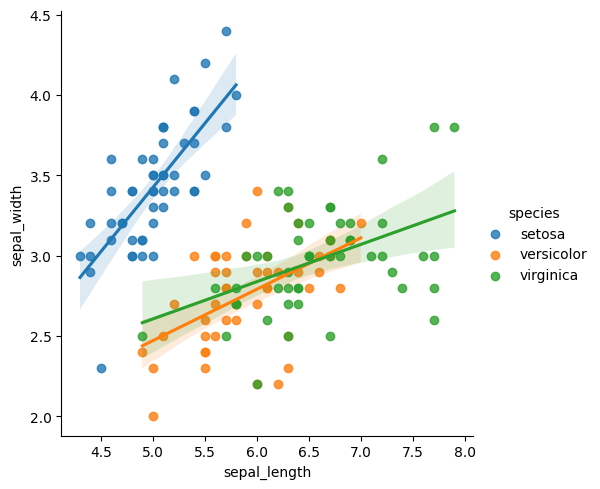

In [35]:
sns.lmplot(x = 'sepal_length', y = 'sepal_width', hue = 'species', data = iris)

Computer Chi-squared test: 只针对categorial 
Chi-square is for categorial variables, if there is significant difference

In [54]:
# convert the 'sepal_width' to a categorial variable

iris['sepal_width_cat'] = pd.cut(iris['sepal_width'], bins =[0, 3, 3.5, 4])

# create a contingency table
contingency_table = pd.crosstab(iris['species'], iris['sepal_width_cat'])

contingency_table

chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f'Chi-squared: {chi2}')
print(f'P-value: {p_val}')


Chi-squared: 51.132288195334525
P-value: 2.0945619933052866e-10


Chi-square interpretation:--only for categorial variable
P-value is very small, so there is a significant difference

PEARSON CORRELATION between two continours variable
它测量两个变量之间的线性关系程度，取值范围从-1到1，其中1表示完全正相关，-1表示完全负相关，0表示无相关性。

In [62]:
pearson_corr, p_val = stats.pearsonr(iris['sepal_length'], iris['sepal_width'])

print(f'Pearson_correlation: {pearson_corr}')
print(f'P-value: {p_val}')



Pearson_correlation: -0.11756978413300208
P-value: 0.15189826071144746


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

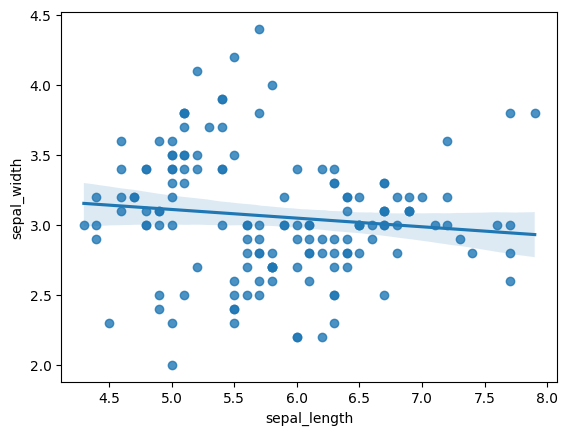

In [65]:
sns.regplot(x='sepal_length', y='sepal_width', data = iris)

we can also calculate pearson's correlation directly n pandas

In [66]:
iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


the null hypothesis for a linear relationship, is tht there is NO linear relationship. 

we can see in this case that the correlation is a low value, and the P-value indicates there is no significant relationship. 

NON-Parametric test & Mann-Whitney to compare means。 

When dealing with data that does not meet the assumptions of parametric tests (such as normality or equal variances), non-parametric tests can be used. Non-parametric tests are distribution-free and rely on fewer assumptions about the underlying data distribution. They are often used when working with categorical or ordinal data or when the data distribution is skewed or has outliers.
    Mann-Whitney Test: compare two independent groups
    Kruskal-Wallis test: three or more indendent groups
    Wilcoxon signed-rank test: two related or paired samples
    Friedman test: three or more related samples. 

In [69]:
setosa =iris[iris['species'] == 'setosa']['sepal_width']
versicolor = iris[iris['species'] == 'versicolor']['sepal_width']

U_stat, p_val = stats.mannwhitneyu(setosa, versicolor)

print(f'U-statistic: {U_stat}')
print(f'P-value: {p_val}')

U-statistic: 2312.0
P-value: 2.1433797280775203e-13


let us try the Kruskal-Wallis test

In [71]:
virginica = iris[iris['species'] == 'virginica']['sepal_width']
setosa =iris[iris['species'] == 'setosa']['sepal_width']
versicolor = iris[iris['species'] == 'versicolor']['sepal_width']

H, p_val =stats.kruskal(virginica, setosa, versicolor)

print(f'H-statistic: {H}')
print(f'P-value: {p_val}')

H-statistic: 63.57114610416391
P-value: 1.569282094031586e-14
